In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("Imported the libraries for EDA")

Imported the libraries for EDA


### Data Dictionary
1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: female or male.

### Exploratoty Data Analysis

Read the data

In [7]:
raw_data = pd.read_excel('../data/Election_data.xlsx', engine = 'openpyxl', sheet_name = 1); raw_data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [18]:
raw_data.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [9]:
raw_data.describe(include = 'all')

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [67]:
data = raw_data.copy()
data.columns = ['respondent_id', 'vote', 'age', 'nat_eco_rat',
       'hh_eco_rat', 'blair', 'hague', 'europe',
       'party_stance', 'gender']

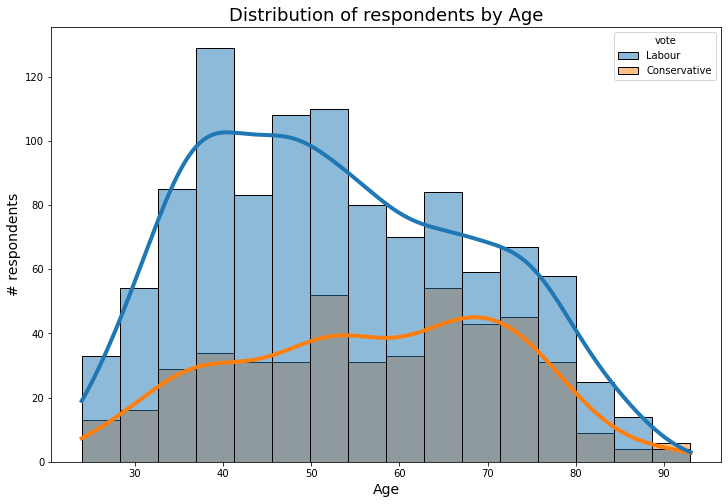

In [68]:
fig = plt.subplots(figsize=(12,8))
sns.histplot(x=data['age'], hue=data['vote'], kde=True, line_kws={'lw':4})
plt.title('Distribution of respondents by Age', fontsize=18); plt.xlabel('Age', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()

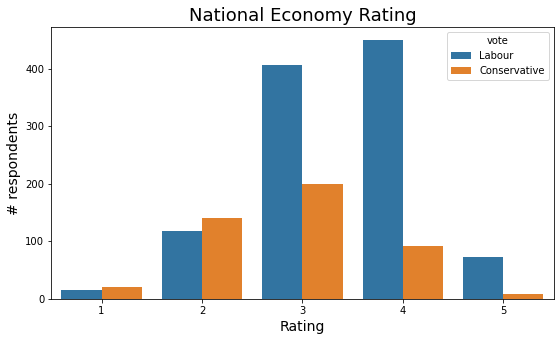

respondent_id
                                 count
nat_eco_rat vote                      
1           Conservative           4.5
            Labour                 1.5
2           Conservative          30.3
            Labour                11.0
3           Conservative          43.3
            Labour                38.3
4           Conservative          19.9
            Labour                42.3
5           Conservative           1.9
            Labour                 6.9

In [72]:
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['nat_eco_rat'], hue=data['vote'])
plt.title('National Economy Rating', fontsize=18); plt.xlabel('Rating', fontsize=14); plt.ylabel('# respondents', fontsize=14)
plt.show()
display(round(data[['respondent_id','nat_eco_rat','vote']].groupby(['nat_eco_rat','vote']).agg(['count'])/data[['respondent_id','vote']].groupby(['vote']).agg(['count'])*100,1))

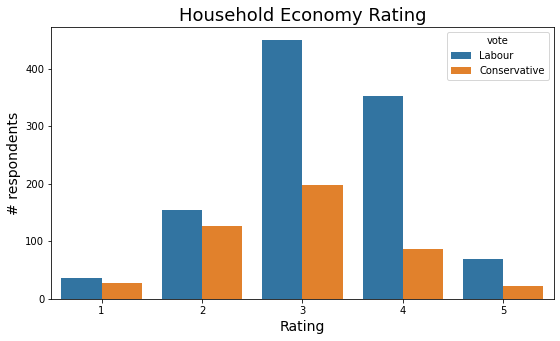

respondent_id
                                count
hh_eco_rat vote                      
1          Conservative           6.1
           Labour                 3.5
2          Conservative          27.3
           Labour                14.5
3          Conservative          42.9
           Labour                42.3
4          Conservative          18.8
           Labour                33.2
5          Conservative           5.0
           Labour                 6.5

In [71]:
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['hh_eco_rat'], hue=data['vote'])
plt.title('Household Economy Rating', fontsize=18); plt.xlabel('Rating', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()
display(round(data[['respondent_id','hh_eco_rat','vote']].groupby(['hh_eco_rat','vote']).agg(['count'])/data[['respondent_id','vote']].groupby(['vote']).agg(['count'])*100,1))

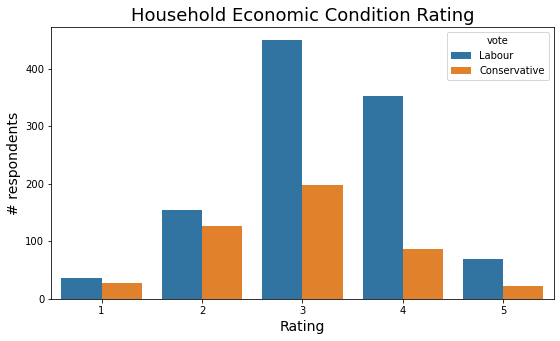

In [55]:
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['economic.cond.household'], hue=data['vote'])
plt.title('Household Economic Condition Rating', fontsize=18); plt.xlabel('Rating', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()

In [58]:
round(raw_data[['Unnamed: 0','economic.cond.household','vote']].groupby(['economic.cond.household','vote']).agg(['count'])/raw_data[['Unnamed: 0','vote']].groupby(['vote']).agg(['count'])*100,1)

Unnamed: 0
                                          count
economic.cond.household vote                   
1                       Conservative        6.1
                        Labour              3.5
2                       Conservative       27.3
                        Labour             14.5
3                       Conservative       42.9
                        Labour             42.3
4                       Conservative       18.8
                        Labour             33.2
5                       Conservative        5.0
                        Labour              6.5